In [7]:
import importlib
import utils  # First import
importlib.reload(utils)  # Force reload the modified module


<module 'utils' from '/home/leo/Documents/HierarchicalPrediction/src/utils.py'>

In [25]:
train_file = "../dataset/CANCER/drugcell_train.txt"
test_file = "../dataset/CANCER/drugcell_test.txt"
cell2id_file = "../dataset/CANCER/cell2ind.txt"
drug2id_file = "../dataset/CANCER/drug2ind.txt"
gene2id_file = "../dataset/CANCER/gene2ind.txt"
cell_feature_file = "../dataset/CANCER/cell2mutation.txt"
drug_feature_file = "../dataset/CANCER/drug2fingerprint.txt"

In [27]:
cell_features = utils.load_feature(cell_feature_file)
drug_features = utils.load_feature(drug_feature_file)
data, cell2id, drug2id = utils.prepare_train_data(train_file, test_file, cell2id_file, drug2id_file)
input_features = utils.build_input_vector(data[0], cell_features, drug_features)

Total number of cell lines = 1225
Total number of drugs = 684


In [28]:
input_features.shape

torch.Size([10000, 5056])

/home/leo/miniforge3/envs/hdp/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


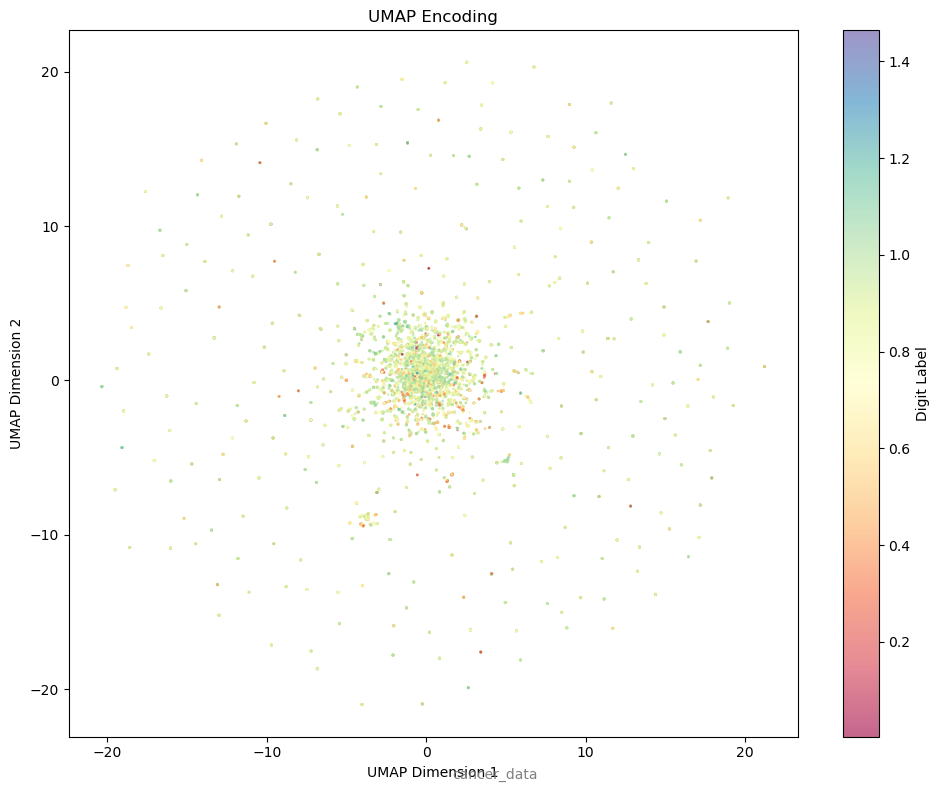

In [35]:
importlib.reload(utils)
utils.visualize_data_from_tensor(input_features, data[1], "cancer_data", showplot=True)

/tmp/ipykernel_414458/2577133059.py:7: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = plt.scatter(X_train_umap[:, 0], X_train_umap[:, 1], cmap="Spectral", s=1, alpha=0.6)


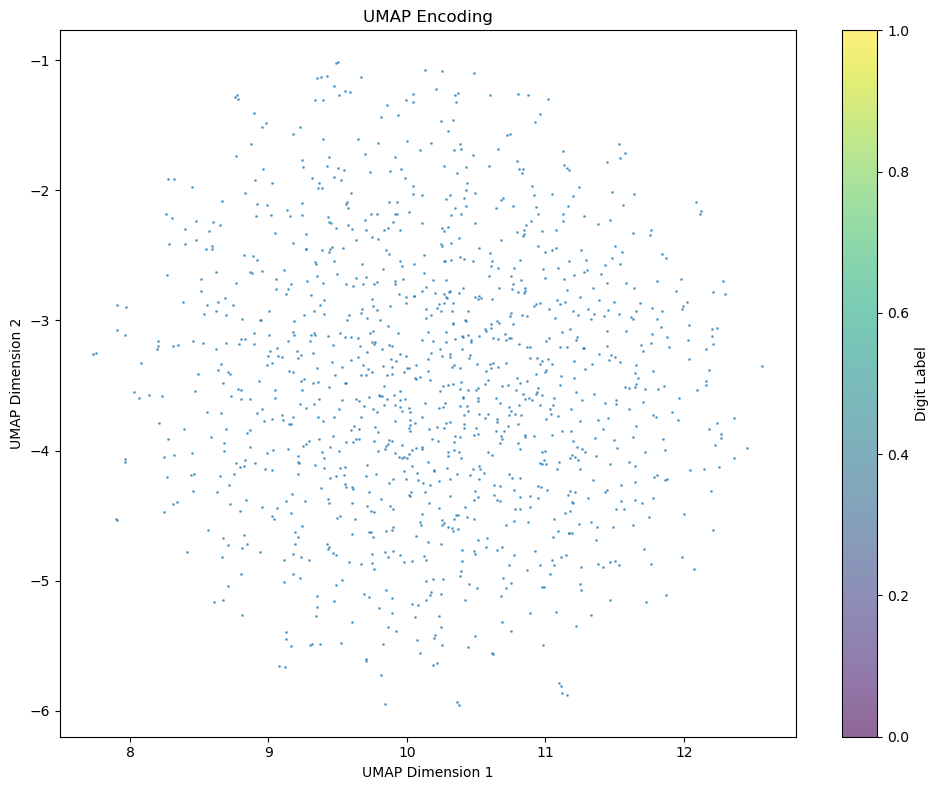

In [40]:
umap = UMAP()
# Fit and transform the data
X_train_umap = umap.fit_transform(cell_features)

# Plot the results
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_train_umap[:, 0], X_train_umap[:, 1], cmap="Spectral", s=1, alpha=0.6)
plt.colorbar(scatter, label="Digit Label")
plt.title("UMAP Encoding")
plt.xlabel("UMAP Dimension 1")
plt.ylabel("UMAP Dimension 2")
# Show the plot
plt.tight_layout()
plt.show()

/tmp/ipykernel_414458/1505537111.py:7: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = plt.scatter(X_train_umap[:, 0], X_train_umap[:, 1], cmap="Spectral", s=1, alpha=0.6)


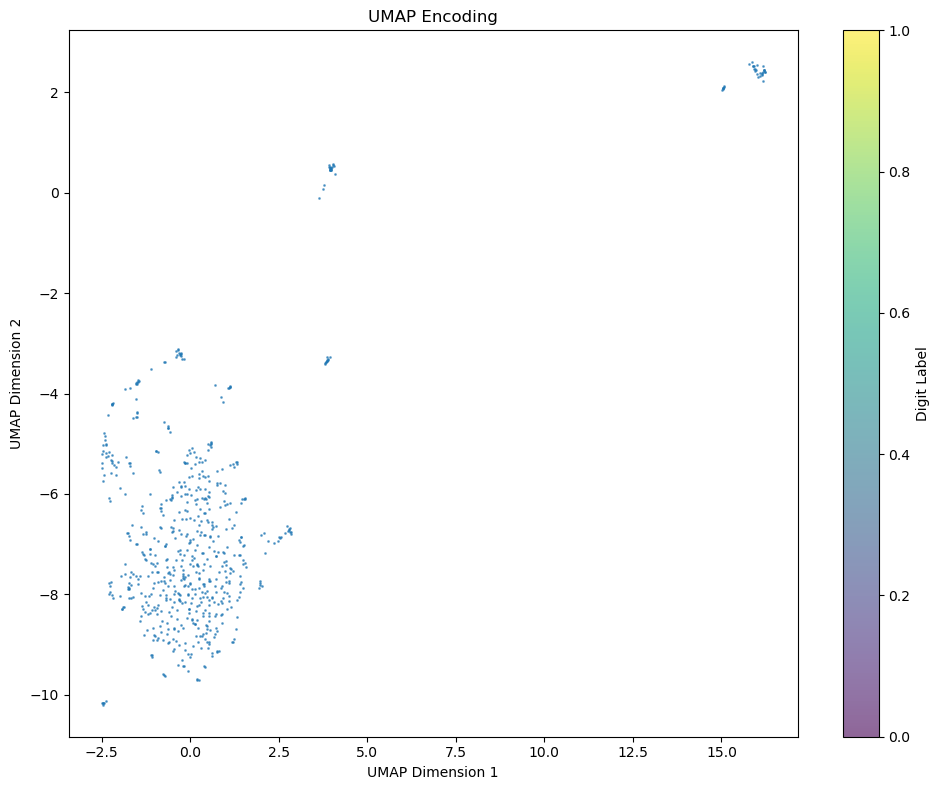

In [41]:
umap = UMAP()
# Fit and transform the data
X_train_umap = umap.fit_transform(drug_features)

# Plot the results
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_train_umap[:, 0], X_train_umap[:, 1], cmap="Spectral", s=1, alpha=0.6)
plt.colorbar(scatter, label="Digit Label")
plt.title("UMAP Encoding")
plt.xlabel("UMAP Dimension 1")
plt.ylabel("UMAP Dimension 2")
# Show the plot
plt.tight_layout()
plt.show()

In [94]:
import pandas as pd

In [95]:
data_dir = "../dataset/Cancer/"

In [96]:
depmap_mutation_ref = pd.read_csv(data_dir+"mutations_NAsdropped.csv")
depmap_mutation_ref.head()

/tmp/ipykernel_5744/3152119630.py:1: DtypeWarning: Columns (23,25,29,30,31,42,53,55) have mixed types. Specify dtype option on import or set low_memory=False.
  depmap_mutation_ref = pd.read_csv(data_dir+"mutations_NAsdropped.csv")


,Unnamed: 0,cell_line_display_name,mutation_id,gene_id,depmap_id,chrom,pos,ref,alt,af,...,provean_prediction,nmd,vep_somatic,lof_number_of_transcripts_in_gene,vep_impact,oncogene_high_impact,am_class,am_pathogenicity,hotspot,gene
0,0,RERFLCMS,1,8637,ACH-000062,chr1,818203,G,A,0.240,...,NaN,NaN,NaN,NaN,HIGH,False,NaN,NaN,False,FAM87B
1,1,MAMEL46,2,15526,ACH-001949,chr1,851926,G,A,0.158,...,NaN,NaN,NaN,NaN,HIGH,False,NaN,NaN,False,LINC01128
2,2,BL70,3,34567,ACH-000402,chr1,924510,GC,AA,0.412,...,NaN,NaN,NaN,NaN,MODERATE,False,NaN,NaN,False,SAMD11
3,3,KYSE180,4,34567,ACH-000693,chr1,924657,C,G,0.437,...,NaN,NaN,NaN,NaN,MODERATE,False,NaN,NaN,False,SAMD11
4,4,HCC1569,5,34567,ACH-000930,chr1,924750,C,T,0.625,...,NaN,NaN,NaN,NaN,MODERATE,False,NaN,NaN,False,SAMD11


In [97]:
# Load CTRPV1 cell line drug response data
ctrp_v1_responses = pd.read_csv(data_dir+"CTRP/CTRPv1/v10.D3.area_under_conc_curve.txt", delimiter='\t')
# Load CTRPV1 drug id to SMILES structure mapping file
ctrp_v1_drug_struct_ref = pd.read_csv(data_dir+"CTRP/CTRPv1/v10.M1.informer_set.txt", delimiter='\t')

In [98]:
ctrp_v1_responses.head()

,ccl_name,cpd_name,area_under_curve
0,U2OS,zebularine,6.0416
1,U2OS,maraviroc,6.8981
2,U2OS,DL-TBOA,6.8593
3,U2OS,triptolide,2.1664
4,U2OS,Bax channel blocker,5.2507


In [ ]:
min_auc = ctrp_v1_responses['area_under_curve'].min()
max_auc = ctrp_v1_responses['area_under_curve'].max()
ctrp_v1_responses['normalized_auc'] = (ctrp_v1_responses['area_under_curve'] - min_auc) / (max_auc - min_auc)

# Step 5: Select only the required columns
ctrp_v1_simplify = ctrp_v1_responses[['ccl_name', 'cpd_name', 'normalized_auc']]

In [140]:
ctrp_v1_ccl_names = ctrp_v1_responses['ccl_name'].unique().tolist()

In [ ]:
ctrp_v1_cpd_names = ctrp_v1_responses['cpd_name'].unique().tolist()

In [100]:
# ccl = 'ISHIKAWAHERAKLIO02ER'
# # Load cell line to mutation mapping file
# ctrp_mutation_ref = pd.read_csv(data_dir+"CTRP/Cosmic_MutantCensus_v101_GRCh38.tsv", delimiter='\t')
# translation_map = str.maketrans("", "", "(-;)+/:._ &#")
# df_filtered = ctrp_mutation_ref[ctrp_mutation_ref['SAMPLE_NAME'].str.translate(translation_map).str.lower() == ccl.lower()]
# df_filtered

In [101]:
non_empty_count = 0
not_contained_ccl = []
gene_counts = {}
for cl_count, ccl in enumerate(ctrp_v1_ccl_names):
    df_filtered = depmap_mutation_ref[depmap_mutation_ref['cell_line_display_name'] == ccl]
    if (not df_filtered.empty):
        non_empty_count += 1
    else:
        not_contained_ccl.append(ccl)
    
    for value in df_filtered['gene']:
        if value in gene_counts:
            if (gene_counts[value] < cl_count+1):
                gene_counts[value] += 1  # Increment if gene first occur in the cell line
        else:
            gene_counts[value] = 1  # Initialize if gene does not exist in the reference  
print("total ccl", len(ctrp_v1_ccl_names), "mutation info count", non_empty_count)
print(not_contained_ccl)

total ccl 242 mutation info count 237
['OCILY10', 'HCT8', 'COLO699', 'CORL51', 'NCIH1755']


In [102]:
len(gene_counts)

17651

In [104]:
# Load CTRPV2 cell line drug response data
ctrp_v2_responses = pd.read_csv(data_dir+"CTRP/CTRPv2/v20.data.curves_post_qc.txt", delimiter='\t')
# Load CTRPV2 experiment id to cell line id mapping file
ctrp_v2_expri2cell_line =  pd.read_csv(data_dir+"CTRP/CTRPv2/v20.meta.per_experiment.txt", delimiter='\t')
# Load CTRPV2 cell line id to cell line name mapping file
ctrp_v2_cell_line_ref =  pd.read_csv(data_dir+"CTRP/CTRPv2/v20.meta.per_cell_line.txt", delimiter='\t')
# Load CTRPV2 drug id to SMILES structure mapping file
ctrp_v2_drug_struct_ref = pd.read_csv(data_dir+"CTRP/CTRPv2/v20.meta.per_compound.txt", delimiter='\t')

In [105]:
ctrp_v2_responses.head()

,experiment_id,conc_pts_fit,fit_num_param,p1_conf_int_high,p1_conf_int_low,p2_conf_int_high,p2_conf_int_low,p4_conf_int_high,p4_conf_int_low,p1_center,p2_slope,p3_total_decline,p4_baseline,apparent_ec50_umol,pred_pv_high_conc,area_under_curve,master_cpd_id
0,1,16,3,-285200.000,285200.000,-29290.0000,29290.0000,-736900.0000,736900.0000,3.170,-0.109100,1.2340,-0.2345,8.9980,0.0192,14.782,1788
1,1,16,3,-12150.000,12160.000,-64010.0000,64010.0000,0.2527,0.6297,4.328,-0.055520,0.5588,0.4412,20.0800,0.4412,13.327,3588
2,1,16,3,-inf,inf,-inf,inf,-inf,inf,-1.524,-0.009165,-0.1647,1.1650,0.3477,1.1647,16.082,12877
3,1,11,3,-223900.000,223900.000,-24890.0000,24890.0000,0.7491,0.9520,-1.391,-0.030000,0.1495,0.8505,0.3812,0.8505,13.743,19153
4,1,16,3,3.027,5.758,-0.7256,0.4286,-0.2099,0.2605,4.393,-0.148500,0.9747,0.0253,21.0000,0.0253,13.390,23256


In [106]:
ctrp_v2_expri2cell_line.head()

,experiment_id,run_id,experiment_date,culture_media,baseline_signal,cells_per_well,growth_mode,snp_fp_status,master_ccl_id
0,1,7024-01-A01-02-01,20120501,DMEM001,0.2225,500,adherent,SNP-matched-reference,130
1,2,7024-01-A01-02-01,20120501,DMEM001,0.2225,500,adherent,SNP-matched-reference,569
2,3,7024-01-A01-02-01,20120501,RPMI001,0.1195,500,adherent,SNP-matched-reference,682
3,4,7024-01-A01-02-02,20120504,DMEM001,0.2225,500,adherent,SNP-unconfirmed,9
4,5,7024-01-A01-02-02,20120504,DMEM001,0.2225,500,adherent,SNP-matched-reference,61


In [107]:
ctrp_v2_cell_line_ref.head()

,master_ccl_id,ccl_name,ccl_availability,ccle_primary_site,ccle_primary_hist,ccle_hist_subtype_1
0,1,697,ccle;public,haematopoietic_and_lymphoid_tissue,lymphoid_neoplasm,acute_lymphoblastic_B_cell_leukaemia
1,3,5637,ccle;public,urinary_tract,carcinoma,NaN
2,4,2313287,ccle;public,stomach,carcinoma,adenocarcinoma
3,5,1321N1,ccle,central_nervous_system,glioma,astrocytoma
4,6,143B,ccle,bone,osteosarcoma,NaN


In [108]:
ctrp_v2_ccl_ids = ctrp_v2_expri2cell_line["master_ccl_id"].unique()
ctrp_v2_ccl_names = ctrp_v2_cell_line_ref[ctrp_v2_cell_line_ref['master_ccl_id'].isin(ctrp_v2_ccl_ids)]['ccl_name'].tolist()

In [ ]:
ctrp_v2_cpd_ids = ctrp_v2_expri2cell_line["master_cpd_id"].unique()
ctrp_v2_cpd_names = ctrp_v2_drug_struct_ref[ctrp_v2_drug_struct_ref['master_cpd_id'].isin(ctrp_v2_cpd_ids)]['cpd_name'].tolist()

In [ ]:
# Step 1: Merge df1 and df2 on 'experiment_id' to get 'master_ccl_id'
merged_df = ctrp_v2_responses.merge(ctrp_v2_expri2cell_line, on='experiment_id')

# Step 2: Merge with df3 to get 'ccl_name'
merged_df = merged_df.merge(ctrp_v2_cell_line_ref, on='master_ccl_id')

# Step 3: Merge with df4 to get 'cpd_name'
merged_df = merged_df.merge(ctrp_v2_drug_struct_ref, on='master_cpd_id')

min_auc = merged_df['area_under_curve'].min()
max_auc = merged_df['area_under_curve'].max()
merged_df['normalized_auc'] = (merged_df['area_under_curve'] - min_auc) / (max_auc - min_auc)

# Step 5: Select only the required columns
ctrp_v2_simplify = merged_df[['ccl_name', 'cpd_name', 'normalized_auc']]

# Display result
print(ctrp_v2_simplify)

In [109]:
non_empty_count = 0
for cl_count, ccl in enumerate(ctrp_v2_ccl_names):
    df_filtered = depmap_mutation_ref[depmap_mutation_ref['cell_line_display_name'] == ccl]
    if (not df_filtered.empty):
        non_empty_count += 1
    else:
        not_contained_ccl.append(ccl)
    for value in df_filtered['gene']:
        if value in gene_counts:
            if (gene_counts[value] < cl_count+1+242):
                gene_counts[value] += 1  # Increment if gene first occur in the cell line
        else:
            gene_counts[value] = 1  # Initialize if gene does not exist in the reference  
print("ctrp_v2 total ccl", len(ctrp_v2_ccl_names), "mutation info count", non_empty_count)
print(not_contained_ccl)

ctrp_v2 total ccl 887 mutation info count 823
['OCILY10', 'HCT8', 'COLO699', 'CORL51', 'NCIH1755', 'BCP1', 'BT112', 'BT131', 'BT139', 'BT145', 'BT147', 'BT159', 'BT164', 'BT172', 'BT179', 'BT187', 'BT216', 'BT224', 'BT228', 'BT231', 'BT239', 'BT248', 'COLO699', 'CORL51', 'DOV13', 'H292', 'HCC1171', 'HCC1588', 'HCC2279', 'HCT8', 'HMCB', 'HS578BST', 'HS688AT', 'HS822T', 'HS888LU', 'HS934T', 'HSTS', 'KMS18', 'KRIJ', 'OCILY10', 'PSTS', 'TTTHYROID', 'BT498', 'NCIH1755', 'NCIH1339', 'NCIH1385', 'NCIH2106', 'BT232', 'BT245', 'BT271', 'BT286', 'BT320', 'BT328', 'BT330', 'BT333', 'BT340', 'BT359', 'BT416', 'BT422', 'BT428', 'BT440', 'BT444', 'BT482', 'BT504', 'TM87-16', '2004', 'ASKA', 'SYO1', 'U-CH1']


In [110]:
len(gene_counts)

18212

In [111]:
# Load GDSC1 cell line drug response data
gdsc1_responses = pd.read_excel(data_dir+"GDSC/GDSC1_fitted_dose_response_27Oct23.xlsx")
# Load GDSC2 cell line drug response data
gdsc2_responses = pd.read_excel(data_dir+"GDSC/GDSC2_fitted_dose_response_27Oct23.xlsx")

In [112]:
gdsc1_responses.head()

,DATASET,NLME_RESULT_ID,NLME_CURVE_ID,COSMIC_ID,CELL_LINE_NAME,SANGER_MODEL_ID,TCGA_DESC,DRUG_ID,DRUG_NAME,PUTATIVE_TARGET,PATHWAY_NAME,COMPANY_ID,WEBRELEASE,MIN_CONC,MAX_CONC,LN_IC50,AUC,RMSE,Z_SCORE
0,GDSC1,342,15580432,684057,ES5,SIDM00263,UNCLASSIFIED,1,Erlotinib,EGFR,EGFR signaling,1045,Y,0.007813,2.0,3.966813,0.985678,0.026081,1.299144
1,GDSC1,342,15580806,684059,ES7,SIDM00269,UNCLASSIFIED,1,Erlotinib,EGFR,EGFR signaling,1045,Y,0.007813,2.0,2.692090,0.972690,0.110059,0.156076
2,GDSC1,342,15581198,684062,EW-11,SIDM00203,UNCLASSIFIED,1,Erlotinib,EGFR,EGFR signaling,1045,Y,0.007813,2.0,2.477990,0.944459,0.087019,-0.035912
3,GDSC1,342,15581542,684072,SK-ES-1,SIDM01111,UNCLASSIFIED,1,Erlotinib,EGFR,EGFR signaling,1045,Y,0.007813,2.0,2.033564,0.950758,0.016290,-0.434437
4,GDSC1,342,15581930,687448,COLO-829,SIDM00909,SKCM,1,Erlotinib,EGFR,EGFR signaling,1045,Y,0.007813,2.0,2.966007,0.954778,0.180255,0.401702


In [ ]:
min_auc = gdsc1_responses['AUC'].min()
max_auc = gdsc1_responses['AUC'].max()
gdsc1_responses['normalized_auc'] = (gdsc1_responses['AUC'] - min_auc) / (max_auc - min_auc)

# Step 5: Select only the required columns
gdsc1_simplify = gdsc1_responses[['CELL_LINE_NAME', 'DRUG_NAME', 'normalized_auc']]
gdsc1_simplify.rename(columns={'CELL_LINE_NAME': 'ccl_name', 'DRUG_NAME': 'cpd_name'})

In [ ]:
min_auc = gdsc2_responses['AUC'].min()
max_auc = gdsc2_responses['AUC'].max()
gdsc2_responses['normalized_auc'] = (gdsc2_responses['AUC'] - min_auc) / (max_auc - min_auc)

# Step 5: Select only the required columns
gdsc2_simplify = gdsc2_responses[['CELL_LINE_NAME', 'DRUG_NAME', 'normalized_auc']]
gdsc2_simplify.rename(columns={'CELL_LINE_NAME': 'ccl_name', 'DRUG_NAME': 'cpd_name'})

In [114]:
import re

gdsc1_ccl_names_raw = gdsc1_responses['CELL_LINE_NAME'].unique()
gdsc2_ccl_names_raw = gdsc2_responses['CELL_LINE_NAME'].unique()
# Remove non-alphanumeric characters and change all letters to upper case
gdsc1_ccl_names = [re.sub(r'[^a-zA-Z0-9]', '', s).upper() for s in gdsc1_ccl_names_raw]
gdsc2_ccl_names = [re.sub(r'[^a-zA-Z0-9]', '', s).upper() for s in gdsc2_ccl_names_raw]

gdsc1_cpd_names_raw = gdsc1_responses['DRUG_NAME'].unique().tolist()
gdsc2_cpd_names_raw = gdsc2_responses['DRUG_NAME'].unique().tolist()

In [169]:
len(gdsc2_ccl_names)

969

In [115]:
non_empty_count = 0
for cl_count, ccl in enumerate(gdsc1_ccl_names):
    df_filtered = depmap_mutation_ref[depmap_mutation_ref['cell_line_display_name'] == ccl]
    if (not df_filtered.empty):
        non_empty_count += 1
    else:
        not_contained_ccl.append(ccl)
    for value in df_filtered['gene']:
        if value in gene_counts:
            if (gene_counts[value] < cl_count+1+242+887):
                gene_counts[value] += 1  # Increment if gene first occur in the cell line
        else:
            gene_counts[value] = 1  # Initialize if gene does not exist in the reference  
print("gdsc1 total ccl", len(gdsc1_ccl_names), "mutation info count", non_empty_count)
print(not_contained_ccl)

gdsc1 total ccl 970 mutation info count 934
['OCILY10', 'HCT8', 'COLO699', 'CORL51', 'NCIH1755', 'BCP1', 'BT112', 'BT131', 'BT139', 'BT145', 'BT147', 'BT159', 'BT164', 'BT172', 'BT179', 'BT187', 'BT216', 'BT224', 'BT228', 'BT231', 'BT239', 'BT248', 'COLO699', 'CORL51', 'DOV13', 'H292', 'HCC1171', 'HCC1588', 'HCC2279', 'HCT8', 'HMCB', 'HS578BST', 'HS688AT', 'HS822T', 'HS888LU', 'HS934T', 'HSTS', 'KMS18', 'KRIJ', 'OCILY10', 'PSTS', 'TTTHYROID', 'BT498', 'NCIH1755', 'NCIH1339', 'NCIH1385', 'NCIH2106', 'BT232', 'BT245', 'BT271', 'BT286', 'BT320', 'BT328', 'BT330', 'BT333', 'BT340', 'BT359', 'BT416', 'BT422', 'BT428', 'BT440', 'BT444', 'BT482', 'BT504', 'TM87-16', '2004', 'ASKA', 'SYO1', 'U-CH1', 'NCIH510A', 'U266', 'BE2M17', 'SR', 'NCIH322M', 'EOL1CELL', 'COLO320HSR', 'RH1', 'OVCAR3', '7860', 'U031', 'U251', 'LU99A', 'NCIH1755', 'SJRH30', 'NCIH2591', 'NCIH2595', 'NCIH2731', 'NCIH2803', 'NCIH2804', 'NCIH2869', 'NCIH290', 'NCIH3118', 'NCIH513', 'PC3JPC3', 'H3255', 'NCIH2369', 'NCIH2373', 'NC

In [116]:
len(gene_counts)

18310

In [117]:
non_empty_count = 0
for cl_count, ccl in enumerate(gdsc2_ccl_names):
    df_filtered = depmap_mutation_ref[depmap_mutation_ref['cell_line_display_name'] == ccl]
    if (not df_filtered.empty):
        non_empty_count += 1
    else:
        not_contained_ccl.append(ccl)
    for value in df_filtered['gene']:
        if value in gene_counts:
            if (gene_counts[value] < cl_count+1+242+887+970):
                gene_counts[value] += 1  # Increment if gene first occur in the cell line
        else:
            gene_counts[value] = 1  # Initialize if gene does not exist in the reference  
print("gdsc1 total ccl", len(gdsc2_ccl_names), "mutation info count", non_empty_count)
print(not_contained_ccl)

gdsc1 total ccl 969 mutation info count 933
['OCILY10', 'HCT8', 'COLO699', 'CORL51', 'NCIH1755', 'BCP1', 'BT112', 'BT131', 'BT139', 'BT145', 'BT147', 'BT159', 'BT164', 'BT172', 'BT179', 'BT187', 'BT216', 'BT224', 'BT228', 'BT231', 'BT239', 'BT248', 'COLO699', 'CORL51', 'DOV13', 'H292', 'HCC1171', 'HCC1588', 'HCC2279', 'HCT8', 'HMCB', 'HS578BST', 'HS688AT', 'HS822T', 'HS888LU', 'HS934T', 'HSTS', 'KMS18', 'KRIJ', 'OCILY10', 'PSTS', 'TTTHYROID', 'BT498', 'NCIH1755', 'NCIH1339', 'NCIH1385', 'NCIH2106', 'BT232', 'BT245', 'BT271', 'BT286', 'BT320', 'BT328', 'BT330', 'BT333', 'BT340', 'BT359', 'BT416', 'BT422', 'BT428', 'BT440', 'BT444', 'BT482', 'BT504', 'TM87-16', '2004', 'ASKA', 'SYO1', 'U-CH1', 'NCIH510A', 'U266', 'BE2M17', 'SR', 'NCIH322M', 'EOL1CELL', 'COLO320HSR', 'RH1', 'OVCAR3', '7860', 'U031', 'U251', 'LU99A', 'NCIH1755', 'SJRH30', 'NCIH2591', 'NCIH2595', 'NCIH2731', 'NCIH2803', 'NCIH2804', 'NCIH2869', 'NCIH290', 'NCIH3118', 'NCIH513', 'PC3JPC3', 'H3255', 'NCIH2369', 'NCIH2373', 'NC

In [118]:
len(gene_counts)

18311

In [119]:
# Load PRISM Secondary cell line drug response data
prism_secondary_responses = pd.read_csv(data_dir+"PRISM/secondary-screen-dose-response-curve-parameters.csv")

/tmp/ipykernel_5744/2068724061.py:2: DtypeWarning: Columns (14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  prism_secondary_responses = pd.read_csv(data_dir+"PRISM/secondary-screen-dose-response-curve-parameters.csv")


In [120]:
prism_secondary_responses.head()

,broad_id,depmap_id,ccle_name,screen_id,upper_limit,lower_limit,slope,r2,auc,ec50,ic50,name,moa,target,disease.area,indication,smiles,phase,passed_str_profiling,row_name
0,BRD-K71847383-001-12-5,ACH-000879,MFE296_ENDOMETRIUM,HTS002,1,2.122352,-0.022826,-0.026964,1.677789,8.415093e+06,NaN,cytarabine,ribonucleotide reductase inhibitor,"POLA1, POLB, POLD1, POLE",hematologic malignancy,"acute lymphoblastic leukemia (ALL), chronic ly...",Nc1ccn([C@@H]2O[C@H](CO)[C@@H](O)[C@H]2O)c(=O)...,Launched,True,ACH-000879
1,BRD-K71847383-001-12-5,ACH-000320,PSN1_PANCREAS,HTS002,1,1.325174,-0.237504,-0.147274,1.240300,9.643742e+00,NaN,cytarabine,ribonucleotide reductase inhibitor,"POLA1, POLB, POLD1, POLE",hematologic malignancy,"acute lymphoblastic leukemia (ALL), chronic ly...",Nc1ccn([C@@H]2O[C@H](CO)[C@@H](O)[C@H]2O)c(=O)...,Launched,True,ACH-000320
2,BRD-K71847383-001-12-5,ACH-001145,OC316_OVARY,HTS002,1,2.089350,-0.302937,0.193893,1.472333,2.776687e-02,NaN,cytarabine,ribonucleotide reductase inhibitor,"POLA1, POLB, POLD1, POLE",hematologic malignancy,"acute lymphoblastic leukemia (ALL), chronic ly...",Nc1ccn([C@@H]2O[C@H](CO)[C@@H](O)[C@H]2O)c(=O)...,Launched,True,ACH-001145
3,BRD-K71847383-001-12-5,ACH-000873,KYSE270_OESOPHAGUS,HTS002,1,1.311820,-0.209393,-0.005460,1.207160,2.654701e+00,NaN,cytarabine,ribonucleotide reductase inhibitor,"POLA1, POLB, POLD1, POLE",hematologic malignancy,"acute lymphoblastic leukemia (ALL), chronic ly...",Nc1ccn([C@@H]2O[C@H](CO)[C@@H](O)[C@H]2O)c(=O)...,Launched,True,ACH-000873
4,BRD-K71847383-001-12-5,ACH-000855,KYSE150_OESOPHAGUS,HTS002,1,1.369799,-0.277530,0.132818,1.229332,5.889041e-01,NaN,cytarabine,ribonucleotide reductase inhibitor,"POLA1, POLB, POLD1, POLE",hematologic malignancy,"acute lymphoblastic leukemia (ALL), chronic ly...",Nc1ccn([C@@H]2O[C@H](CO)[C@@H](O)[C@H]2O)c(=O)...,Launched,True,ACH-000855


In [ ]:
min_auc = prism_secondary_responses['auc'].min()
max_auc = prism_secondary_responses['auc'].max()
gdsc2_responses['normalized_auc'] = (prism_secondary_responses['auc'] - min_auc) / (max_auc - min_auc)

# Step 5: Select only the required columns
prism_secondary_simplify = prism_secondary_responses[['ccle_name', 'name', 'normalized_auc']]
prism_secondary.rename(columns={'ccle_name': 'ccl_name', 'name': 'cpd_name'})

In [121]:
prism_secondary_ccl_depmap_ids = prism_secondary_responses['depmap_id'].dropna().unique().tolist()

In [136]:
prism_secondary_ccl_names = depmap_mutation_ref[depmap_mutation_ref['depmap_id'].isin(prism_secondary_ccl_depmap_ids)]["cell_line_display_name"].tolist()
prism_secondary_cpd_names = prism_secondary_responses['name'].dropna().unique().tolist()

In [122]:
non_empty_count = 0
for cl_count, depmapid in enumerate(prism_secondary_ccl_depmap_ids):
    df_filtered = depmap_mutation_ref[depmap_mutation_ref['depmap_id'] == depmapid]
    if (not df_filtered.empty):
        non_empty_count += 1
    else:
        print("depmap id {} could not be found".format(depmapid))
    for value in df_filtered['gene']:
        if value in gene_counts:
            if (gene_counts[value] < cl_count+1+242+887+970+969):
                gene_counts[value] += 1  # Increment if gene first occur in the cell line
        else:
            gene_counts[value] = 1  # Initialize if gene does not exist in the reference  
print("prism secondary total ccl", len(prism_secondary_ccl_depmap_ids), "mutation info count", non_empty_count)
print(not_contained_ccl)

prism secondary total ccl 480 mutation info count 480
['OCILY10', 'HCT8', 'COLO699', 'CORL51', 'NCIH1755', 'BCP1', 'BT112', 'BT131', 'BT139', 'BT145', 'BT147', 'BT159', 'BT164', 'BT172', 'BT179', 'BT187', 'BT216', 'BT224', 'BT228', 'BT231', 'BT239', 'BT248', 'COLO699', 'CORL51', 'DOV13', 'H292', 'HCC1171', 'HCC1588', 'HCC2279', 'HCT8', 'HMCB', 'HS578BST', 'HS688AT', 'HS822T', 'HS888LU', 'HS934T', 'HSTS', 'KMS18', 'KRIJ', 'OCILY10', 'PSTS', 'TTTHYROID', 'BT498', 'NCIH1755', 'NCIH1339', 'NCIH1385', 'NCIH2106', 'BT232', 'BT245', 'BT271', 'BT286', 'BT320', 'BT328', 'BT330', 'BT333', 'BT340', 'BT359', 'BT416', 'BT422', 'BT428', 'BT440', 'BT444', 'BT482', 'BT504', 'TM87-16', '2004', 'ASKA', 'SYO1', 'U-CH1', 'NCIH510A', 'U266', 'BE2M17', 'SR', 'NCIH322M', 'EOL1CELL', 'COLO320HSR', 'RH1', 'OVCAR3', '7860', 'U031', 'U251', 'LU99A', 'NCIH1755', 'SJRH30', 'NCIH2591', 'NCIH2595', 'NCIH2731', 'NCIH2803', 'NCIH2804', 'NCIH2869', 'NCIH290', 'NCIH3118', 'NCIH513', 'PC3JPC3', 'H3255', 'NCIH2369', 'NCIH

In [123]:
len(gene_counts)

18317

In [126]:
sorted_gene_counts = dict(sorted(gene_counts.items(), key=lambda item: item[1], reverse=True))

In [149]:
gene_descending = list(sorted_gene_counts.keys())
gene_value_descending = list(sorted_gene_counts.values())

In [142]:
total_ccl_name = list(set(ctrp_v1_ccl_names + ctrp_v2_ccl_names + gdsc1_ccl_names + gdsc2_ccl_names + prism_secondary_ccl_names))
total_cpd_name = list(set(ctrp_v1_cpd_names + ctrp_v2_cpd_names + gdsc1_cpd_names + gdsc2_cpd_names + prism_secondary_cpd_names))

In [143]:
len(total_ccl_name)

1313

In [153]:
import numpy as np
binary_mutations = []
for ccl in total_ccl_name:
    df_filtered = depmap_mutation_ref[depmap_mutation_ref['cell_line_display_name'] == ccl]
    mutation = np.zeros(18317)
    for value in df_filtered['gene']:
        if value in sorted_gene_counts:
            index = gene_descending.index(value)
            mutation[index] = 1
    binary_mutations.append(mutation)

In [161]:
binary_mutation_matrix = np.stack(binary_mutations)

In [9]:
from umap import UMAP
umap = UMAP()
# Fit and transform the data
X_train_umap = umap.fit_transform(binary_mutation_matrix)

# Plot the results
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_train_umap[:, 0], X_train_umap[:, 1], cmap="Spectral", s=1, alpha=0.6)
plt.colorbar(scatter, label="Digit Label")
plt.title("UMAP Encoding")
plt.xlabel("UMAP Dimension 1")
plt.ylabel("UMAP Dimension 2")
# Show the plot
plt.tight_layout()
plt.show()

NameError: name 'binary_mutation_matrix' is not defined

In [164]:
binary_mutation_ref = pd.DataFrame(binary_mutation_matrix.T.astype(int), columns=total_ccl_name)

In [165]:
binary_mutation_ref.head()

,IGR1,ML1,CAL148,ZR751,OVCA420,PANC0813,PANC1,A704,JEG3,TEN,...,CHL1,NCIH747,SH4,SKGIIIA,TTC709,CL40,TM31,ASPC1,FADU,CFPAC1
0,1,0,1,1,0,0,1,1,0,0,...,0,1,0,1,0,0,0,0,1,0
1,1,0,1,0,0,0,0,0,1,1,...,1,0,1,1,1,1,0,1,1,0
2,1,1,1,1,1,1,1,1,0,0,...,1,1,1,1,1,0,0,0,1,0
3,1,0,1,0,1,0,0,0,0,0,...,1,1,1,1,0,0,0,0,0,0
4,0,1,1,0,1,0,1,0,0,1,...,1,1,0,1,0,1,1,1,1,1


In [167]:
binary_mutation_ref.to_csv("../dataset/Cancer/binary_mutations.csv", index=True)

In [ ]:
total_responses = pd.concat([ctrp_v1_simplify, ctrp_v2_simplify, gdsc1_simplify, gdsc2_simplify, prism_secondary_simplify], ignore_index=True)

# Drug Preprocessing

In [2]:
import pubchempy as pcp

c = pcp.Compound.from_cid(199472)

c.isomeric_smiles

'C1[C@H]([C@@H](OC2=CC(=CC(=C21)O)O)C3=CC(=C(C(=C3)O)O)O)OC(=O)C4=CC(=C(C(=C4)O)O)O'

In [5]:
pcp.get_compounds("Erlotinib", 'name')[0].isomeric_smiles

'COCCOC1=C(C=C2C(=C1)C(=NC=N2)NC3=CC=CC(=C3)C#C)OCCOC'

In [5]:
import pubchempy as pcp

def get_smiles(drug_name):
    compounds = pcp.get_compounds(drug_name, 'name')
    if compounds:
        return compounds[0].isomeric_smiles  # Returns the first match's SMILES
    return None  # Return None if no results found



In [9]:
from rdkit import Chem
from rdkit.Chem.rdFingerprintGenerator import GetMorganGenerator  # Correct import for new RDKit
import numpy as np

def get_morgan_fingerprint(smiles, radius=2, n_bits=2048):
    mol = Chem.MolFromSmiles(smiles)  # Convert SMILES to molecule
    if mol is None:
        return None  # Invalid SMILES
    
    generator = GetMorganGenerator(radius=radius, fpSize=n_bits)  # New recommended method
    fingerprint = generator.GetFingerprint(mol)

    # Convert to NumPy array
    fingerprint_bits = np.array(fingerprint, dtype=int)

    return fingerprint_bits


In [ ]:
morgan_footprints = []
not_contained_cpd = []
for cpd in total_cpd_name:
    smiles = get_smiles(drug_name)
    if (smils == None):
        not_contained_cpd.append(cpd)
    else:
        fp = get_morgan_fingerprint(smiles)
        morgan_footprints.append(fp)

In [ ]:
morgan_footprints_matrix = np.stack(morgan_footprints)

In [12]:
# Example usage
drug_name = "Erlotinib"
smiles = get_smiles(drug_name)
print(smiles)
fp = get_morgan_fingerprint(smiles)
fp

COCCOC1=C(C=C2C(=C1)C(=NC=N2)NC3=CC=CC(=C3)C#C)OCCOC


array([0, 0, 0, ..., 0, 0, 0])

In [3]:
fp.shape

(2048,)

In [8]:
import rdkit
print(rdkit.__version__)


2024.09.5
